In [96]:
# The effect of making literal real values double precision
# and replacing `implicit real` with `implicit none`
# is investigated here.

# To make the literal real value `8.` double precision,
# re-write it as `8._r8`, where `r8 = kind(1.0d0)`.

# In replacing `implicit real` with `implicit none`,
# names that weren't explicitly declared need to be
# explicitly declared now.

In [2]:
%matplotlib inline
import os
import io

import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dir_run = os.path.join('/nuwa_cluster/home/jackyu',
                       'radiation/crd/LW/examples',
                       'separate_g_groups',
                       '03_lbl_flux_of_g_groups_08-25',
                       'study__effect_of_r8_literal_real_values')

In [2]:
# The quantity on which the effect is looked at is
# the absorption coefficient at some (P, T)
# for nitrogen-only in CLIRAD-LW's band 7: 1215 cm-1 ~ 1280 cm-1

In [32]:
# The original precision settings. (git: f873783)
pathf = os.path.join(dir_run,
                     'literal_real_values_original',
                     'absgas_f873783.dat')

df_org = pd.read_csv(pathf, sep=r'\s+')


In [33]:
# _r8 literal real values (git: ea7c6cb)
pathf = os.path.join(dir_run,
                     'literal_real_values_r8',
                     'absgas_ea7c6cb.dat')

df_r8 = pd.read_csv(pathf, sep=r'\s+')

In [34]:
# git 6a02dc9
# _r8 literal real values
# implicit none in transf()
pathf = os.path.join(dir_run,
                     'literal_real_values_r8',
                     'absgas_6a02dc9.dat')

df_r8_impnone_transf = pd.read_csv(pathf, sep=r'\s+')

In [39]:
# git 6fcddb8
# _r8 literal real values
# implicit none in transf()
# implicit none in irflux()

pathf = os.path.join(dir_run,
                     'literal_real_values_r8',
                     'absgas_6fcddb8.dat')

df_r8_impnone_transf_irflux = pd.read_csv(pathf, sep=r'\s+')

In [56]:
# git a2591a9
# _r8 literal real values
# implicit none in transf()
# implicit none in irflux()
# implicit none in voigh2()

pathf = os.path.join(dir_run,
                     'literal_real_values_r8',
                     'absgas_a2591a9.dat')

df_r8_impnone_transf_irflux_voigh2 = pd.read_csv(pathf, sep=r'\s+')

In [64]:
# git 4b6e0c5
# _r8 literal real values
# implicit none in transf()
# implicit none in irflux()
# implicit none in voigh2()
# implicit none in vibpf()

pathf = os.path.join(dir_run,
                     'literal_real_values_r8',
                     'absgas_4b6e0c5.dat')

df_r8_impnone_transf_irflux_voigh2_vibpf = pd.read_csv(pathf, 
                                                       sep=r'\s+')



In [59]:
# ea11539
# _r8 literal real values
# implicit none in transf()
# implicit none in irflux()
# implicit none in voigh2()
# implicit none in vibpf()
# implicit none in lblabs()

pathf = os.path.join(dir_run,
                     'literal_real_values_r8',
                     'absgas_ea11539.dat')

df_r8_impnone_transf_irflux_voigh2_vibpf_lblabs = pd.read_csv(pathf, 
                                                              sep=r'\s+')



In [43]:
# 68a990d
# _r8 literal real values
# implicit none in transf()
# implicit none in irflux()
# lblcom_lee_real8.f

pathf = os.path.join(dir_run,
                     'literal_real_values_r8',
                     'using_lees_lblcom',
                     'absgas_68a990d.dat')

df_r8_impnone_transf_irflux_lblcom_lee_real8 = pd.read_csv(pathf,
                                                           sep=r'\s+')

In [65]:
# first noticeable difference is seen in using `implicit none` in 
# the function vibpf
df_r8.describe() - df_r8_impnone_transf_irflux_voigh2_vibpf.describe()

,wavenumber,absgas
count,0,0.000000e+00
mean,0,-1.631230e-27
std,0,-2.049904e-27
min,0,0.000000e+00
25%,0,0.000000e+00
50%,0,0.000000e+00
75%,0,0.000000e+00
max,0,0.000000e+00


In [66]:
# Noticeable and significant difference seen in using `implicit none`
# in subroutine lblabs()
df_r8.describe() - df_r8_impnone_transf_irflux_voigh2_vibpf_lblabs.describe()

,wavenumber,absgas
count,0,0.000000e+00
mean,0,5.796679e-20
std,0,1.616224e-19
min,0,2.164042e-26
25%,0,1.770482e-23
50%,0,2.385184e-21
75%,0,4.184341e-20
max,0,1.480130e-18


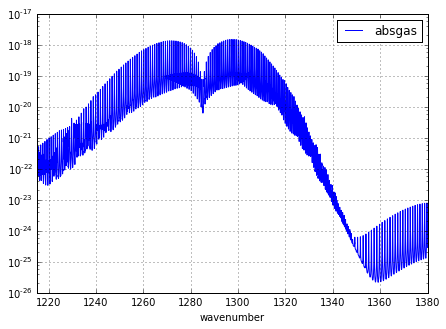

In [54]:
# plot of absorption coefficient against wavenumber
# _r8 literal real values (git: ea7c6cb)

df_r8.plot(figsize=(7,5), x='wavenumber', y='absgas',
           logy=True, grid=True)

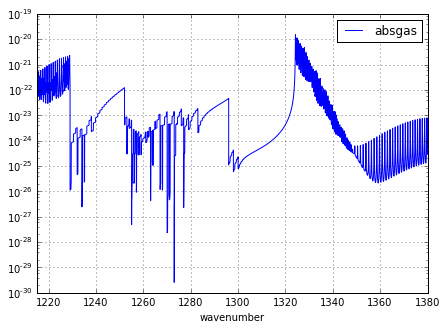

In [67]:
# plot of absorption coefficient against wavenumber
# ea11539
# _r8 literal real values
# implicit none in transf()
# implicit none in irflux()
# implicit none in voigh2()
# implicit none in vibpf()
# implicit none in lblabs()

df_r8_impnone_transf_irflux_voigh2_vibpf_lblabs.plot(figsize=(7,5), 
                                        x='wavenumber', 
                                        y='absgas',
                                        logy=True, grid=True)

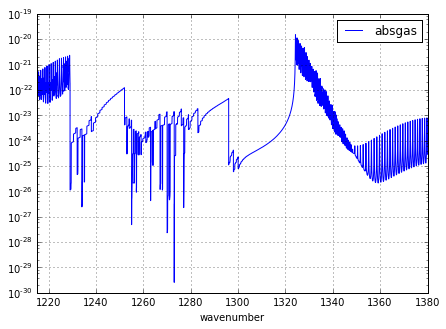

In [44]:
# The same drop in absorption coefficient is also seen
# by using Lee's lblcom_real8.f.

# plot of absorption coefficient against wavenumber
# 68a990d
# _r8 literal real values
# implicit none in transf()
# implicit none in irflux()
# lblcom_lee_real8.f

df_r8_impnone_transf_irflux_lblcom_lee_real8\
.plot(figsize=(7,5), x='wavenumber', y='absgas',
           logy=True, grid=True)

In [98]:
# The cause of the drop in the absorption coefficient is traced
# to lblabs(), where the hitran data file is rewound just before
# the absorption coefficient is computed for each `iband`.

# This is seen by looking by looking at `vstart` and `vcheck` for 
# each iband.
# `vstart` is the wavenumber from which line-by-line calculation
# should start for the iband.
# `vcheck` is the wavenumber of the line centre of the absorption line
# rewound to.
# `vcheck` should be very close to `vstart`, just above it. 

# aside:
# `vfirst` is the wavenumber of the line centre of the first
# absorption line considered in the iband.
# `vlast` is the wavenumber of the line centre of the last 
# absorption line considered in the iband.

In [147]:
# before lblabs is made completely `implicit none`
# with `vstart`, `vcheck`, `vfirst` and `vlast` printed out
# git: eef7da6


pathf = os.path.join(dir_run,
                     'literal_real_values_r8',
                     'out_eef7da6.log')

with open(pathf, mode='r', encoding='utf8') as f:
    lines = f.readlines()
    
lines = [l.strip() for l in lines]
lines0 = [l for l in lines if l.startswith('vvebug ')]
lines1 = [l for l in lines if l.startswith('vvebug1 ')]

df0 = pd.read_csv(io.StringIO('\n'.join(lines0)),
                  header=None, sep=r'\s+')
df0.drop(0, axis=1, inplace=True)
df0.columns = ['vstart', 'vcheck', 'vline']

df1 = pd.read_csv(io.StringIO('\n'.join(lines1)),
                  header=None, sep=r'\s+')
df1.drop(0, axis=1, inplace=True)
df1.columns = ['vfirst', 'vlast']

df_vibpf = pd.concat([df0, df1], axis=1)

df_vibpf.index = range(1, len(df_vibpf.index) + 1)
df_vibpf.index.names = ['iband']
df_vibpf.columns.names = ['wavenumber']

In [138]:
# after lblabs is made completely `implicit none`
# with `vstart`, `vcheck`, `vfirst` and `vlast` printed out
# git: d716b8b

pathf = os.path.join(dir_run,
                     'literal_real_values_r8',
                     'out_d716b8b.log')

with open(pathf, mode='r', encoding='utf8') as f:
    lines = f.readlines()
    
lines = [l.strip() for l in lines]
lines0 = [l for l in lines if l.startswith('vvebug ')]
lines1 = [l for l in lines if l.startswith('vvebug1 ')]

df0 = pd.read_csv(io.StringIO('\n'.join(lines0)),
                  header=None, sep=r'\s+')
df0.drop(0, axis=1, inplace=True)
df0.columns = ['vstart', 'vcheck', 'vline']

df1 = pd.read_csv(io.StringIO('\n'.join(lines1)),
                  header=None, sep=r'\s+')
df1.drop(0, axis=1, inplace=True)
df1.columns = ['vfirst', 'vlast']

df_lblabs = pd.concat([df0, df1], axis=1)

df_lblabs.index = range(1, len(df_vibpf.index) + 1)
df_lblabs.index.names = ['iband']
df_lblabs.columns.names = ['wavenumber']



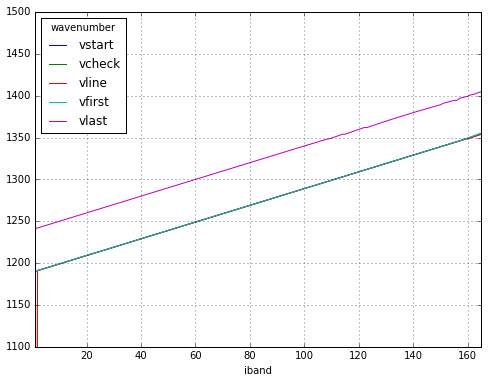

In [149]:
# plot of `vstart`, `vcheck`, `vfirst`, `vlast` against `iband`
# before lblabs is made completely `implicit none`
# with `vstart`, `vcheck`, `vfirst` and `vlast` printed out
# git: eef7da6

df_vibpf\
        .plot(figsize=(8,6), grid=True,
              ylim=(1100, 1500))

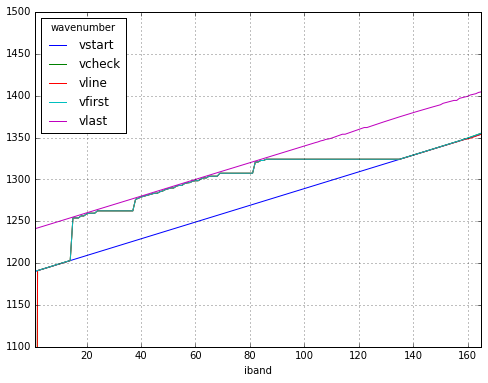

In [143]:
# plot of `vstart`, `vcheck`, `vfirst`, `vlast` against `iband`
# after lblabs is made completely `implicit none`
# with `vstart`, `vcheck`, `vfirst` and `vlast` printed out
# git: d716b8b

df_lblabs\
         .plot(figsize=(8, 6), grid=True,
               ylim=(1100, 1500))

In [99]:
## After playing about with their precisions, it is evident that 
# the precisions (kinds) of `vcheck` and `vline` have something
# to do with the premature stop of the rewinding of the hitran file.

# `vcheck .eq. vline .and. zcheck .eq. zline` is to catch adjacent lines  
# that are the same (with the same vline and zline)

# If kind(vcheck) = 4 and kind(vline) = 8, then the catching 
# mechanism fails. 

# But it doesn't fail on all occasions, letting some identical lines 
# to pass through.

# If kind(vcheck) = kind(vline) = 4, or = 8, 
# then the catching mechanism works.  
# It catches adjacent lines that are same as each other.

# Aside:
# If kind(vcheck) = 8 and kind(vline) = 4, the the catching 
# mechanism still works, this can perhaps be explained by the fact
# that the value of the vline read in from the hitran file is
# assigned to `vcheck` (i.e. vcheck = vline), and since `vline`
# is lower in precision, there is no loss of decimals when its
# value is assigned to `vcheck`.  This means that when `vcheck` and 
# `vline` are compared, they have the same number of decimals, so
# the comparison is fair, and will work.

In [92]:
# duplicated `vline` and `zline`
# crd
# git: 4f31b08

pathf = os.path.join(dir_run,
                     'literal_real_values_r8',
                     'out.log')

with open(pathf, mode='r', encoding='utf8') as f:
    lines = f.readlines()
    
lines = [l.strip() for l in lines]

lines = [{'vline': float(l1.split('vwarn')[1].strip()), 
          'zline': l2}
         for l1, l2 in zip(lines, lines[1:]) 
         if l1.startswith('vwarn')]

df_dup_lines = pd.DataFrame(lines)
df_dup_lines.drop_duplicates(inplace=True)
df_dup_lines.sort_values('vline', inplace=True)
df_dup_lines.reset_index(inplace=True)
df_dup_lines.drop('index', axis=1, inplace=True)

In [85]:
# duplicated `vline` and `zline`
# using code for line-reading only
# git: be6739a

pathf = os.path.join('/nuwa_cluster/home/jackyu',
                     'radiation/crd/absorption_lines',
                     'out.log')

with open(pathf, mode='r', encoding='utf8') as f:
    lines = f.readlines()
    
lines = [l.strip() for l in lines]

lines = [{'vline': float(l1.split('vwarn')[1].strip()), 
          'zline': l2}
         for l1, l2 in zip(lines, lines[1:]) 
         if l1.startswith('vwarn')]

df_dup_lines1 = pd.DataFrame(lines)
df_dup_lines1.drop_duplicates(inplace=True)
df_dup_lines1.sort_values('vline', inplace=True)
df_dup_lines1.reset_index(inplace=True)
df_dup_lines1.drop('index', axis=1, inplace=True)

In [93]:
# show duplicated lines obtained from crd and from linereader
# side-by-side

pd.concat([df_dup_lines, df_dup_lines1], keys=['crd', 'linereader'], 
          axis=1)

crd                                                  linereader  \
          vline                                          zline        vline   
0   1253.928101  1 2 2 0        0 2 2 0                    P 1  1253.928101   
1   1256.375610    1 2 2 0        0 2 2 0                    P  1256.375610   
2   1258.800659    1 2 2 0        0 2 2 0                    P  1258.800659   
3   1259.604004    1 2 2 0        0 2 2 0                    P  1259.604004   
4   1262.432373  1 1 1 0        0 1 1 0                    P 1  1262.432373   
5   1276.161499  1 3 3 0        0 3 3 0                    P 2  1276.161499   
6   1277.088257  1 3 3 0        0 3 3 0                    P 2  1277.088257   
7   1277.381470  1 2 2 0        0 2 2 0                    R 1  1277.381470   
8   1278.932861  1 3 3 0        0 3 3 0                    P 2  1278.932861   
9   1279.850586  1 3 3 0        0 3 3 0                    P 2  1279.850586   
10  1280.881836    1 2 2 0        0 2 2 0                    P  1280.881836   
11  1281.677246  1 3 3 0        0 3 3 0                    P 2  1281.677246   
12  1282.586060  1 3 3 0        0 3 3 0                    P 2  1282.586060   
13  1283.491821  1 3 3 0        0 3 3 0                    P 2  1283.491821   
14  1285.332153    2 2 2 0        1 2 2 0                    P  1285.332153   
15  1286.187012    2 2 2 0        1 2 2 0                    P  1286.187012   
16  1287.887817    2 2 2 0        1 2 2 0                    P  1287.887817   
17  1288.863037  1 3 3 0        0 3 3 0                    P 1  1288.863037   
18  1289.747559  1 3 3 0        0 3 3 0                    P 1  1289.747559   
19  1291.105469    1 2 2 0        0 2 2 0                    P  1291.105469   
20  1291.964844    1 2 2 0        0 2 2 0                    P  1291.964844   
21  1292.820923    1 2 2 0        0 2 2 0                    P  1292.820923   
22  1294.124390    1 3 3 0        0 3 3 0                    P  1294.124390   
23  1294.523682    1 2 2 0        0 2 2 0                    P  1294.523682   
24  1294.990601    1 3 3 0        0 3 3 0                    P  1294.990601   
25  1295.853638    1 3 3 0        0 3 3 0                    P  1295.853638   
26  1296.225830    1 4 2 0        0 4 2 0                    P  1296.225830   
27  1297.022095    1 2 2 0        0 2 2 0                    Q  1297.022095   
28  1297.044434    1 2 2 0        0 2 2 0                    Q  1297.044434   
29  1297.570435    1 3 3 0        0 3 3 0                    P  1297.570435   
30  1297.933228    1 4 2 0        0 4 2 0                    P  1297.933228   
31  1298.424194    1 3 3 0        0 3 3 0                    P  1298.424194   
32  1300.383057    1 2 2 0        0 2 2 0                    R  1300.383057   
33  1301.761475    1 3 3 0        0 3 3 0                    Q  1301.761475   
34  1301.777100    1 3 3 0        0 3 3 0                    Q  1301.777100   
35  1301.789551    1 3 3 0        0 3 3 0                    Q  1301.789551   
36  1303.799561    1 4 2 0        0 4 2 0                    R  1303.799561   
37  1307.367188  2 2 2 0        1 2 2 0                    R 1  1307.367188   
38  1320.291260  1 3 3 0        0 3 3 0                    R 2  1320.291260   
39  1320.764404  1 2 2 0        0 2 2 0                    R 2  1320.764404   
40  1322.578491  1 3 3 0        0 3 3 0                    R 2  1322.578491   
41  1324.087402  1 3 3 0        0 3 3 0                    R 2  1324.087402   

                                                   
                                            zline  
0   1 2 2 0        0 2 2 0                    P 1  
1     1 2 2 0        0 2 2 0                    P  
2     1 2 2 0        0 2 2 0                    P  
3     1 2 2 0        0 2 2 0                    P  
4   1 1 1 0        0 1 1 0                    P 1  
5   1 3 3 0        0 3 3 0                    P 2  
6   1 3 3 0        0 3 3 0                    P 2  
7   1 2 2 0        0 2 2 0                    R 1  
8   1 3 3 0    

In [95]:
# duplicated lines caught in crd and line reader are identical ones

all(df_dup_lines == df_dup_lines1)

True